In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
x = np.array([[1, 1], [1, 1], [2, 2], [2, 3]])
y = np.dot(x, [1, 2]) + 3
reg = LinearRegression().fit(x,y)
reg.score(x, y)
reg.coef_ 
reg.intercept_
reg.predict(np.array([[3, 5], [6, 7]]))

array([16., 23.])

In [6]:
# data loading, data implementation

data = pd.read_csv("USA_Housing.csv")
data.head()
data.info()
statistics = data.describe()
cols = data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


<AxesSubplot:>

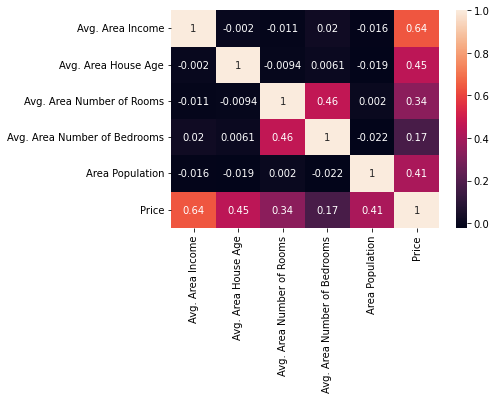

In [11]:
# data exploration
#sns.pairplot(data)
sns.heatmap(data.corr(), annot=True)

In [8]:
# data splitting (x, y) / preparation

X = data[[cols[0], cols[1], cols[2], cols[3], cols[4]]]
y = data[['Price']]

In [14]:
# training / validation split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=10)


In [15]:
# model building


lin_reg = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
lin_reg.fit(X_train, y_train)
lin_reg = lin_reg['linearregression']
lin_reg.coef_
# lin_reg.intercept_


array([[232897.17820071, 161323.59499023, 124970.4265839 ,
         -1835.0314519 , 154368.54563343]])

C:\Users\Tamerlan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


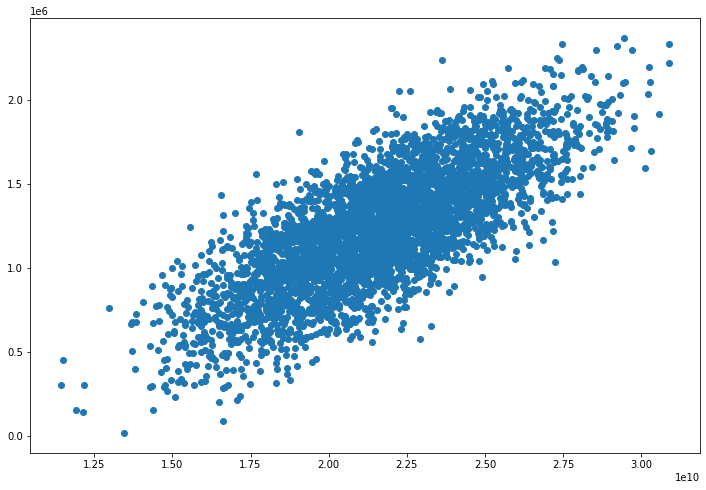

In [18]:
# estimation the productivity of the model / evaluation of the model

prediction = lin_reg.predict(X_test)
plt.figure(figsize = (12, 8))
plt.scatter(prediction, y_test)


In [ ]:
#polynomial regression

poly_reg = PolynomialFeatures(degree=2)

X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.fit_transform(X_test)

lin_reg.fit(X_train_2d,y_train)

predictions = lin_reg.predict(X_test_2d)
plt.plot(y_test, predictions, 'o')


evaluation_2 = evaluate(y_test, predictions)